In [1]:
%%time
import sys

sys.path.append("../..")

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sns

import src.datasets.loading.ookla
import src.datasets.loading.statcan
import src.datasets.joins

from src.config import DATA_DIRECTORY

CPU times: user 1.51 s, sys: 692 ms, total: 2.21 s
Wall time: 4.24 s


In [2]:
%%time
das_info = gp.read_file(DATA_DIRECTORY / "hackathon" / "geometry.gpkg", driver="GPKG")
speed_data = pd.read_csv(DATA_DIRECTORY / "hackathon" / "speeds.csv")
speed_data.DAUID = speed_data.DAUID.astype(str)

CPU times: user 1min 17s, sys: 1.24 s, total: 1min 18s
Wall time: 1min 19s


In [3]:
%%time
# Add dates for plotting
full_data = pd.merge(das_info, speed_data)
full_data["date"] = pd.to_datetime(
    full_data["year"].astype(str)
    + "-"
    + ((full_data["quarter"] - 1) * 3 + 1).astype(str)
    + "-01"
)

CPU times: user 3.98 s, sys: 1.09 s, total: 5.06 s
Wall time: 5.09 s


In [4]:
#full_data.head(1)

In [5]:
#das_info.head()

In [6]:
das_info.loc[1]

DAUID                                                                         10010245
PRUID                                                                               10
PRNAME                               Newfoundland and Labrador / Terre-Neuve-et-Lab...
CDUID                                                                             1001
CDNAME                                                                 Division No.  1
CDTYPE                                                                             CDR
CCSUID                                                                         1001519
CCSNAME                                                                     St. John's
CSDUID                                                                         1001519
CSDNAME                                                                     St. John's
CSDTYPE                                                                             CY
ERUID                                      

In [430]:
years = speed_data['year'].unique()
df = full_data[full_data['year'].isin(years[:4]) | 
                   full_data['quarter'].isin([1,2])]
df

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,geometry,year,quarter,conn_type,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,date
0,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,"POLYGON ((-52.76815 47.55803, -52.76902 47.557...",2019,1,fixed,67011.800000,44715.000000,8.400000,58.0,36.0,2019-01-01
1,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,"POLYGON ((-52.76815 47.55803, -52.76902 47.557...",2019,1,mobile,68257.000000,51528.000000,64.000000,1.0,1.0,2019-01-01
2,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,"POLYGON ((-52.76815 47.55803, -52.76902 47.557...",2019,2,fixed,81122.800000,58796.000000,9.600000,90.0,40.0,2019-04-01
3,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,"POLYGON ((-52.76815 47.55803, -52.76902 47.557...",2019,2,mobile,147485.000000,18384.000000,66.500000,3.0,3.0,2019-04-01
4,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,"POLYGON ((-52.76815 47.55803, -52.76902 47.557...",2019,3,fixed,63661.888889,45392.000000,12.777778,184.0,88.0,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263551,59530210,59,British Columbia / Colombie-Britannique,5953,Fraser-Fort George,RD,5953042,Fraser-Fort George C,5953023,Prince George,...,"POLYGON ((-122.79632 54.00549, -122.79500 54.0...",2022,4,mobile,62945.000000,2219.000000,33.000000,3.0,3.0,2022-10-01
2263552,59530210,59,British Columbia / Colombie-Britannique,5953,Fraser-Fort George,RD,5953042,Fraser-Fort George C,5953023,Prince George,...,"POLYGON ((-122.79632 54.00549, -122.79500 54.0...",2023,1,fixed,220113.571429,126711.285714,12.857143,46.0,12.0,2023-01-01
2263553,59530210,59,British Columbia / Colombie-Britannique,5953,Fraser-Fort George,RD,5953042,Fraser-Fort George C,5953023,Prince George,...,"POLYGON ((-122.79632 54.00549, -122.79500 54.0...",2023,1,mobile,4308.000000,860.000000,39.000000,1.0,1.0,2023-01-01
2263554,59530210,59,British Columbia / Colombie-Britannique,5953,Fraser-Fort George,RD,5953042,Fraser-Fort George C,5953023,Prince George,...,"POLYGON ((-122.79632 54.00549, -122.79500 54.0...",2023,2,fixed,193053.400000,207039.400000,13.600000,24.0,14.0,2023-04-01


In [431]:
# Number of unique areas
df['DAUID'].unique().shape[0]

56589

## PCCLASS

#### The following is a list of the population centre size classes.

2 - Small population centre (population 1,000 to 29,999) <br>
3 - Medium population centre (population 30,000 to 99,999) <br>
4 - Large urban population centre (population 100,000 or greater) <be>

## PCTYPE

##### The following is a list of the population centre types.

- 1 - Core inside of a census metropolitan area or census agglomeration
- 2 - Fringe inside of a census metropolitan area or census agglomeration
- 4 - Population centre outside of a census metropolitan area or census agglomeration
- 6 - Secondary core inside of a census metropolitan area or census agglomeration


In [92]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2037204 entries, 0 to 2263555
Data columns (total 63 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   DAUID                              object        
 1   PRUID                              object        
 2   PRNAME                             object        
 3   CDUID                              object        
 4   CDNAME                             object        
 5   CDTYPE                             object        
 6   CCSUID                             object        
 7   CCSNAME                            object        
 8   CSDUID                             object        
 9   CSDNAME                            object        
 10  CSDTYPE                            object        
 11  ERUID                              object        
 12  ERNAME                             object        
 13  SACCODE                            object        
 14 

In [247]:
df.shape

(240192, 63)

In [11]:
# Provinces
provinces = df['PRNAME'].unique()
provinces

array(['Newfoundland and Labrador / Terre-Neuve-et-Labrador',
       'Prince Edward Island / Île-du-Prince-Édouard',
       'Nova Scotia / Nouvelle-Écosse',
       'New Brunswick / Nouveau-Brunswick', 'Quebec / Québec', 'Ontario',
       'Manitoba', 'Saskatchewan', 'Alberta',
       'British Columbia / Colombie-Britannique',
       'Northwest Territories / Territoires du Nord-Ouest', 'Nunavut',
       'Yukon'], dtype=object)

In [12]:
# Number of areas without city name by provinces
print(f'Number of areas without city name by provinces:')
df[df['PCNAME'].isna()]['PRNAME'].value_counts()

Number of areas without city name by provinces:


PRNAME
Ontario                                                151632
Quebec / Québec                                        128232
British Columbia / Colombie-Britannique                 68004
Alberta                                                 57024
Saskatchewan                                            52128
New Brunswick / Nouveau-Brunswick                       31572
Nova Scotia / Nouvelle-Écosse                           30492
Manitoba                                                29016
Newfoundland and Labrador / Terre-Neuve-et-Labrador     21996
Prince Edward Island / Île-du-Prince-Édouard             6948
Northwest Territories / Territoires du Nord-Ouest        2304
Yukon                                                    1692
Nunavut                                                  1584
Name: count, dtype: int64

In [13]:
prop_wo_city = df[df['PCNAME'].isna()]['PRNAME'].count()/df.shape[0]
print(f'Proportion of areas without city name: {prop_wo_city:.2f}')

Proportion of areas without city name: 0.29


In [14]:
df['CSDTYPE'].value_counts()

CSDTYPE
CY     676152
V      399060
C      183420
T      181836
MÉ      65052
TP      61740
CV      58824
IRI     56124
MU      48132
DM      47808
MD      38808
RM      31068
RGM     30564
RDA     30312
VL      26388
P       17280
SC      13320
PE      11016
SM      10260
NO       9288
TV       8712
SNO      5544
LOT      4464
CT       2880
HAM      2016
SV       1836
M        1656
S-É      1476
RV       1476
COM      1260
RCR      1224
IGD      1224
TI        864
NV        828
TC        648
VN        612
VC        504
SÉ        468
SET       432
SA        396
NH        396
ID        360
CU        360
CG        216
LGD       180
IM        180
SG        144
NL        144
CC        108
CN         36
TK         36
VK         36
TL         36
Name: count, dtype: int64

### CSDTYPE	CSD description
- C	City / Cité 
- CC	Chartered community
- CG	Community government
- CN	Crown colony / Colonie de la couronne
- COM	Community
- CT	Canton (municipalité de)
- CU	Canton unis (municipalité de)
- CV	City / Ville
- CY	City
- DM	District municipality
- HAM	Hamlet
- ID	Improvement district
- IGD	Indian government district
- IM	Island municipality
- IRI	Indian reserve / Réserve indienne
- LGD	Local government district
- LOT	Township and royalty
- M	Municipality / Municipalité
- MD	Municipal district
- MÉ	Municipalité
- MU	Municipality
- NH	Northern hamlet
- NL	Nisga'a land
- NO	Unorganized / Non organisé
- NV	Northern village
- P	Parish / Paroisse (municipalité de)
- PE	Paroisse (municipalité de)
- RCR	Rural community / Communauté rurale
- RDA	Regional district electoral area
- RG	Region
- RGM	Regional municipality
- RM	Rural municipality
- RV	Resort village
- S-É	Indian settlement / Établissement indien
- SA	Special area
- SC	Subdivision of county municipality / Subdivision municipalité de comté
- SÉ	Settlement / Établissement
- SET	Settlement
- SG	Self-government / Autonomie gouvernementale
- SM	Specialized municipality
- SNO	Subdivision of unorganized / Subdivision non organisée
- SV	Summer village
- T	Town
- TC	Terres réservées aux Cris
- TI	Terre inuite
- TK	Terres réservées aux Naskapis
- TL	Teslin land
- TP	Township
- TV	Town / Ville
- V	Ville
- VC	Village cri
- VK	Village naskapi
- VL	Village
- VN	Village nordique


In [437]:
urban_area_codes = ['C', 'CC', 'CG', 'CV', 'CY', 'DM', 'IGD', 'IRI', 'RCR', 'RGM', 'RM', 'RV', 'S-É', 'SA', 'SÉ', 'SET', 'SG', 'SM', 'SV', 'T', 'TC', 'TL', 'TP', 'TV', 'V', 'VC', 'VK', 'VL', 'VN']
rural_area_codes = ['CN', 'COM', 'CT', 'CU', 'HAM', 'ID', 'IM', 'LGD', 'LOT', 'M', 'MD', 'MÉ', 'MU', 'NH', 'NL', 'NO', 'NV', 'P', 'PE', 'RDA', 'RG', 'SNO']
urban_area_codes = ['2', '3', '4']
rural_area_codes = [None]

In [435]:
df0['PCCLASS'].unique()

array(['4', nan, '2', '3'], dtype=object)

In [244]:
df['PCNAME'].isna().sum()
#df['CMANAME'].unique().shape[0]

209844

In [249]:
df0[df0['PCNAME'].isna()]['CSDTYPE'].value_counts()

CSDTYPE
T      61992
MÉ     56772
TP     52632
IRI    52056
V      46188
CY     44532
MD     38016
MU     31788
RM     29952
RDA    26712
VL     23328
P      17172
SC     11592
PE     10548
DM     10332
NO      9288
RGM     9216
CV      6876
C       6588
SNO     5544
LOT     4428
SM      3384
TV      2844
CT      2808
HAM     1836
SV      1764
S-É     1476
RV      1476
M       1368
COM     1260
RCR     1152
IGD     1152
TI       864
NV       792
VN       540
VC       504
TC       468
SÉ       468
SET      432
SA       396
NH       396
ID       360
CU       324
CG       216
IM       144
NL       144
SG       144
CC       108
LGD      108
CN        36
VK        36
TK        36
TL        36
Name: count, dtype: int64

In [250]:
df0[df0['PCNAME'].notna()]['CSDTYPE'].value_counts()

CSDTYPE
CY     631620
V      352872
C      176832
T      119844
CV      51948
DM      37476
RGM     21348
MU      16344
TP       9108
MÉ       8280
SM       6876
TV       5868
IRI      4068
RDA      3600
VL       3060
SC       1728
RM       1116
MD        792
PE        468
M         288
TC        180
HAM       180
P         108
VN         72
LGD        72
RCR        72
SV         72
IGD        72
CT         72
CU         36
NV         36
LOT        36
IM         36
Name: count, dtype: int64

In [253]:
df0[(df0['PCNAME'].notna()) & (df0['year'] == 2023) & (df0['conn_type'] == 'fixed') & (df0['quarter'] == 2)]['Pop_2021'].sum()

25567371.0

In [16]:
# Cities
cities = df['PCNAME'].unique()
print(f'Number of unique cities: {cities.shape[0]}')
#cities

Number of unique cities: 923


In [17]:
# Number of unique areas
df['DAUID'].unique().shape[0]

56589

Missing values

In [18]:
df_isna_sum = df.isna().sum()
for key, value in df_isna_sum.items():
    print(f'{key}: {value}')

DAUID: 0
PRUID: 0
PRNAME: 0
CDUID: 0
CDNAME: 0
CDTYPE: 0
CCSUID: 0
CCSNAME: 0
CSDUID: 0
CSDNAME: 0
CSDTYPE: 0
ERUID: 0
ERNAME: 0
SACCODE: 0
SACTYPE: 0
CMAUID: 462348
CMAPUID: 462348
CMANAME: 462348
CMATYPE: 462348
CTUID: 658800
CTNAME: 658800
ADAUID: 0
PCUID: 582624
PCNAME: 582624
PCTYPE: 582624
PCPUID: 582624
PCCLASS: 582624
CENSUS_YEAR: 64836
DGUID: 64836
ALT_GEO_CODE: 64836
GEO_LEVEL: 64836
GEO_NAME: 64836
Pop_2021: 70812
Pop_2016: 2037204
Pop_change_percent: 2037204
Private_Dwellings: 70812
Pop_density_square_km: 70848
Land_area_square_km: 64836
Income_count_total: 117540
Median_income_count: 182052
Median_income: 182052
After-tax_income-count: 182052
After-tax_income: 182052
Income_count_25_percent: 120348
Mean_income_count: 195012
Mean_income: 195048
After-tax_mean_income_count: 195012
After-tax_mean_income: 195048
Household_income_count: 182052
Median_household_income: 182052
Median_household_after-tax_income: 182052
Indigenous_identity_count_total: 120348
Indigenous_identity_co

In [90]:
df[df['avg_u_kbps'].isna()].head(10)

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,geometry,year,quarter,conn_type,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,date


# Overall statistics
## Proportion of areas connected with 50/10 (urban/rural, fixed/mobile)

In [93]:
# Save before changing
df0 = df.copy()


In [438]:
df_urban = df[df['PCCLASS'].isin(urban_area_codes)]
df_urban['PCNAME'].value_counts()

df = df_urban

In [439]:
df_urban_fixed = df[(df['year'] == 2023) &
                 (df['quarter'] == 2) &
                 (df['conn_type'] == 'fixed')]
canada_urban_fixed = df_urban_fixed.copy()
canada_urban_fixed[['avg_d_kbps', 'avg_u_kbps']] = canada_urban_fixed[['avg_d_kbps', 'avg_u_kbps']]/1024
canada_urban_fixed['achieve'] = (canada_urban_fixed['avg_d_kbps'] >= 50) & (canada_urban_fixed['avg_u_kbps'] >= 10)
can_fix_prop_u = canada_urban_fixed['achieve'].sum()/canada_urban_fixed.shape[0]


In [440]:
df_urban_mobile = df[(df['year'] == 2023) &
                 (df['quarter'] == 2) &
                 (df['conn_type'] == 'mobile')]
canada_urban_mobile = df_urban_mobile.copy()
canada_urban_mobile[['avg_d_kbps', 'avg_u_kbps']] = canada_urban_mobile[['avg_d_kbps', 'avg_u_kbps']]/1024
canada_urban_mobile['achieve'] = (canada_urban_mobile['avg_d_kbps'] >= 50) & (canada_urban_mobile['avg_u_kbps'] >= 10)
can_mob_prop_u = canada_urban_mobile['achieve'].sum()/canada_urban_mobile.shape[0]

In [24]:
# df_urban_overall = df[(df['year'] == 2023) &
#                  (df['quarter'] == 2)]
# canada_urban_overall = df_urban_overall.copy()
# canada_urban_overall[['avg_d_kbps', 'avg_u_kbps']] = canada_urban_overall[['avg_d_kbps', 'avg_u_kbps']]/1024
# canada_urban_overall_p = (canada_urban_overall['avg_d_kbps'] >= 50) & (canada_urban_overall['avg_u_kbps'] >= 10)
# can_overall_prop = canada_urban_overall_p.sum()/canada_urban_overall_p.shape[0]

In [441]:
%%time
df_urban_overall = df_urban_fixed.copy()
df_urban_overall.rename(columns = {'avg_d_kbps': 'avg_fixed_d_kbps', 'avg_u_kbps': 'avg_fixed_u_kbps'}, inplace = True)
merged_df = df_urban_overall.merge(df_urban_mobile[['DAUID', 'avg_d_kbps', 'avg_u_kbps']], on='DAUID', how='left')
merged_df.rename(columns={'avg_d_kbps': 'avg_mobile_d_kbps', 'avg_u_kbps': 'avg_mobile_u_kbps'}, inplace=True)
df_urban_overall = merged_df
#df_urban_overall.head()

CPU times: user 281 ms, sys: 13.1 ms, total: 294 ms
Wall time: 300 ms


In [442]:
canada_urban_overall = df_urban_overall.copy()
canada_urban_overall[['avg_fixed_d_kbps', 'avg_fixed_u_kbps', 'avg_mobile_d_kbps', 'avg_mobile_u_kbps']] = canada_urban_overall[['avg_fixed_d_kbps', 'avg_fixed_u_kbps', 'avg_mobile_d_kbps', 'avg_mobile_u_kbps']]/1024
canada_urban_overall['achieve'] = (((canada_urban_overall['avg_fixed_d_kbps'] >= 50) | (canada_urban_overall['avg_mobile_d_kbps'] >= 50)) &
                         ((canada_urban_overall['avg_fixed_u_kbps'] >= 10) | (canada_urban_overall['avg_mobile_u_kbps'] >= 10)))
can_overall_prop_u = canada_urban_overall['achieve'].sum()/canada_urban_overall.shape[0]
#can_overall_prop

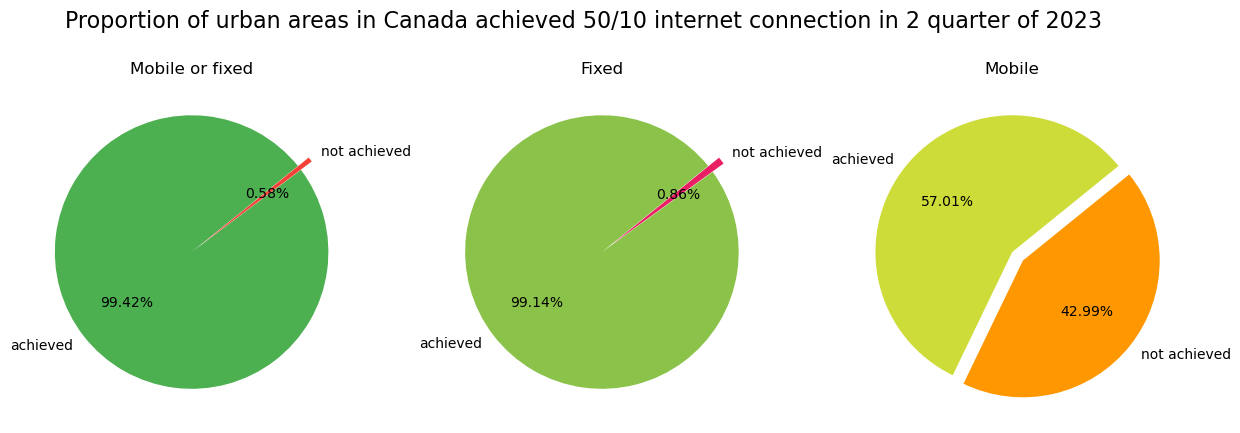

In [443]:
green_colors = ['#4CAF50', '#8BC34A', '#CDDC39']
red_colors = ['#F44336', '#E91E63', '#FF9800']
color_map = [green_colors[0], red_colors[0]]
color_map1 = [green_colors[1], red_colors[1]]
color_map2 = [green_colors[2], red_colors[2]]
fig, ax = plt.subplots(1, 3, figsize =  (15, 6))
ax[0].pie([can_overall_prop_u, 1-can_overall_prop_u], explode = [0, 0.1],colors = color_map, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[1].pie([can_fix_prop_u, 1-can_fix_prop_u], explode = [0, 0.1],colors = color_map1, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[2].pie([can_mob_prop_u, 1-can_mob_prop_u], explode = [0, 0.1],colors = color_map2, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[0].set_title('Mobile or fixed')
ax[1].set_title('Fixed')
ax[2].set_title('Mobile')
plt.suptitle('Proportion of urban areas in Canada achieved 50/10 internet connection in 2 quarter of 2023', x=0.5, y=0.9, fontsize=16, ha='center')
plt.show()

In [448]:
df_rural = df0[df0['PCCLASS'].isna()]
df_rural['PCNAME'].value_counts()
df = df_rural

In [450]:
df_rural_fixed = df[(df['year'] == 2023) &
                 (df['quarter'] == 2) &
                 (df['conn_type'] == 'fixed')]
canada_rural_fixed = df_rural_fixed.copy()
canada_rural_fixed[['avg_d_kbps', 'avg_u_kbps']] = canada_rural_fixed[['avg_d_kbps', 'avg_u_kbps']]/1024
canada_rural_fixed['achieve'] = (canada_rural_fixed['avg_d_kbps'] >= 50) & (canada_rural_fixed['avg_u_kbps'] >= 10)
can_fix_prop = canada_rural_fixed['achieve'].sum()/canada_rural_fixed.shape[0]

In [451]:
df_rural_mobile = df[(df['year'] == 2023) &
                 (df['quarter'] == 2) &
                 (df['conn_type'] == 'mobile')]
canada_rural_mobile = df_rural_mobile.copy()
canada_rural_mobile[['avg_d_kbps', 'avg_u_kbps']] = canada_rural_mobile[['avg_d_kbps', 'avg_u_kbps']]/1024
canada_rural_mobile['achieve'] = (canada_rural_mobile['avg_d_kbps'] >= 50) & (canada_rural_mobile['avg_u_kbps'] >= 10)
can_mob_prop = canada_rural_mobile['achieve'].sum()/canada_rural_mobile.shape[0]

In [452]:
%%time
df_rural_overall = df_rural_fixed.copy()
df_rural_overall.rename(columns = {'avg_d_kbps': 'avg_fixed_d_kbps', 'avg_u_kbps': 'avg_fixed_u_kbps'}, inplace = True)
merged_df = df_rural_overall.merge(df_rural_mobile[['DAUID', 'avg_d_kbps', 'avg_u_kbps']], on='DAUID', how='left')
merged_df.rename(columns={'avg_d_kbps': 'avg_mobile_d_kbps', 'avg_u_kbps': 'avg_mobile_u_kbps'}, inplace=True)
df_rural_overall = merged_df
#df_rural_overall.head()

CPU times: user 47.6 ms, sys: 9.48 ms, total: 57.1 ms
Wall time: 56.6 ms


In [453]:
canada_rural_overall = df_rural_overall.copy()
canada_rural_overall[['avg_fixed_d_kbps', 'avg_fixed_u_kbps', 'avg_mobile_d_kbps', 'avg_mobile_u_kbps']] = canada_rural_overall[['avg_fixed_d_kbps', 'avg_fixed_u_kbps', 'avg_mobile_d_kbps', 'avg_mobile_u_kbps']]/1024
canada_rural_overall['achieve'] = (((canada_rural_overall['avg_fixed_d_kbps'] >= 50) | (canada_rural_overall['avg_mobile_d_kbps'] >= 50)) &
                         ((canada_rural_overall['avg_fixed_u_kbps'] >= 10) | (canada_rural_overall['avg_mobile_u_kbps'] >= 10)))
can_overall_prop = canada_rural_overall['achieve'].sum()/canada_rural_overall.shape[0]
can_overall_prop

0.6996416213544241

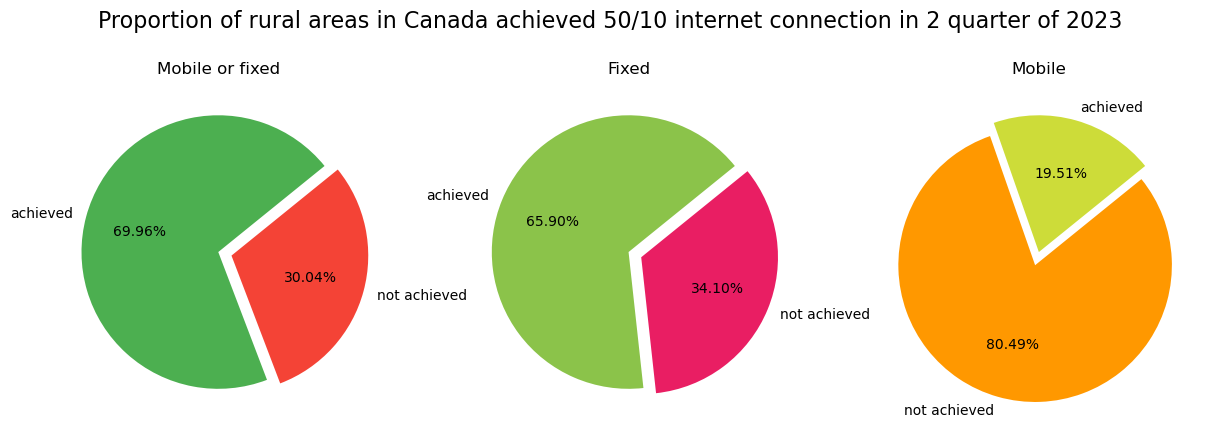

In [454]:
green_colors = ['#4CAF50', '#8BC34A', '#CDDC39']
red_colors = ['#F44336', '#E91E63', '#FF9800']
color_map = [green_colors[0], red_colors[0]]
color_map1 = [green_colors[1], red_colors[1]]
color_map2 = [green_colors[2], red_colors[2]]
fig, ax = plt.subplots(1, 3, figsize =  (15, 6))
ax[0].pie([can_overall_prop, 1-can_overall_prop], explode = [0, 0.1],colors = color_map, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[1].pie([can_fix_prop, 1-can_fix_prop], explode = [0, 0.1],colors = color_map1, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[2].pie([can_mob_prop, 1-can_mob_prop], explode = [0, 0.1],colors = color_map2, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[0].set_title('Mobile or fixed')
ax[1].set_title('Fixed')
ax[2].set_title('Mobile')
plt.suptitle('Proportion of rural areas in Canada achieved 50/10 internet connection in 2 quarter of 2023', x=0.5, y=0.9, fontsize=16, ha='center')
plt.show()

## Proportion of People connected with 50/10 (urban/rural, fixed/mobile)

In [455]:
canada_population = df0[(df0['year'] == 2023) & (df0['quarter'] == 2) & (df0['conn_type'] == 'fixed')]['Pop_2021'].sum()
urban_population = canada_urban_fixed['Pop_2021'].sum()
rural_population = canada_rural_fixed['Pop_2021'].sum()

In [456]:
canada_urban_fixed_pop = canada_urban_fixed[canada_urban_fixed['achieve'] == True]['Pop_2021'].sum()/urban_population
canada_urban_mobile_pop = canada_urban_mobile[canada_urban_mobile['achieve'] == True]['Pop_2021'].sum()/urban_population
canada_urban_overall_pop = canada_urban_overall[canada_urban_overall['achieve'] == True]['Pop_2021'].sum()/urban_population
(canada_urban_fixed_pop, canada_urban_mobile_pop, canada_urban_overall_pop)

(0.9932467831753213, 0.6073348331355617, 0.9955531603151533)

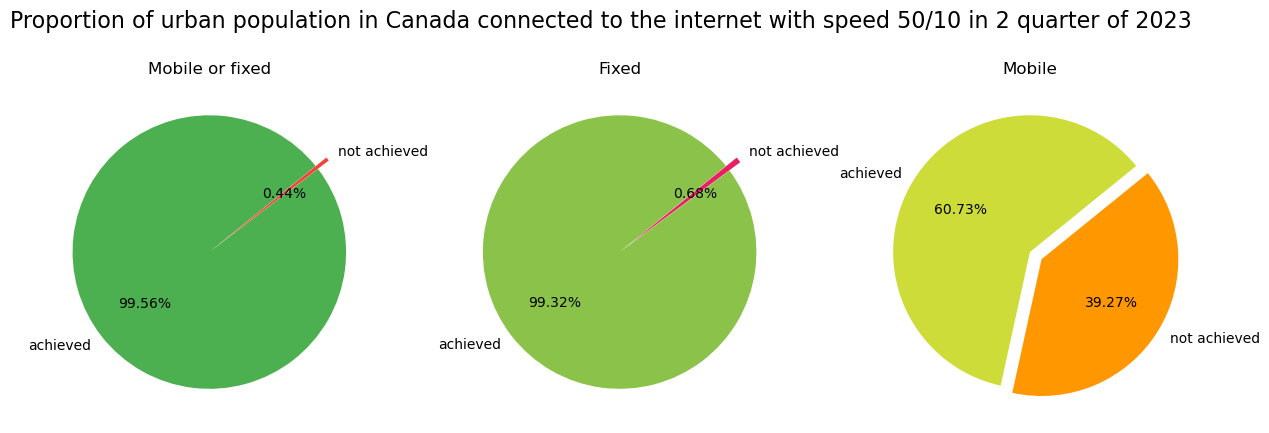

In [457]:
green_colors = ['#4CAF50', '#8BC34A', '#CDDC39']
red_colors = ['#F44336', '#E91E63', '#FF9800']
color_map = [green_colors[0], red_colors[0]]
color_map1 = [green_colors[1], red_colors[1]]
color_map2 = [green_colors[2], red_colors[2]]
fig, ax = plt.subplots(1, 3, figsize =  (15, 6))
ax[0].pie([canada_urban_overall_pop, 1-canada_urban_overall_pop], explode = [0, 0.1],colors = color_map, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[1].pie([canada_urban_fixed_pop, 1-canada_urban_fixed_pop], explode = [0, 0.1],colors = color_map1, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[2].pie([canada_urban_mobile_pop, 1-canada_urban_mobile_pop], explode = [0, 0.1],colors = color_map2, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[0].set_title('Mobile or fixed')
ax[1].set_title('Fixed')
ax[2].set_title('Mobile')
plt.suptitle('Proportion of urban population in Canada connected to the internet with speed 50/10 in 2 quarter of 2023', x=0.5, y=0.9, fontsize=16, ha='center')
plt.show()

In [458]:
canada_rural_fixed_pop = canada_rural_fixed[canada_rural_fixed['achieve'] == True]['Pop_2021'].sum()/rural_population
canada_rural_mobile_pop = canada_rural_mobile[canada_rural_mobile['achieve'] == True]['Pop_2021'].sum()/rural_population
canada_rural_overall_pop = canada_rural_overall[canada_rural_overall['achieve'] == True]['Pop_2021'].sum()/rural_population
(canada_rural_fixed_pop, canada_rural_mobile_pop, canada_rural_overall_pop)

(0.7658168543237056, 0.2524651619735632, 0.8053233947848151)

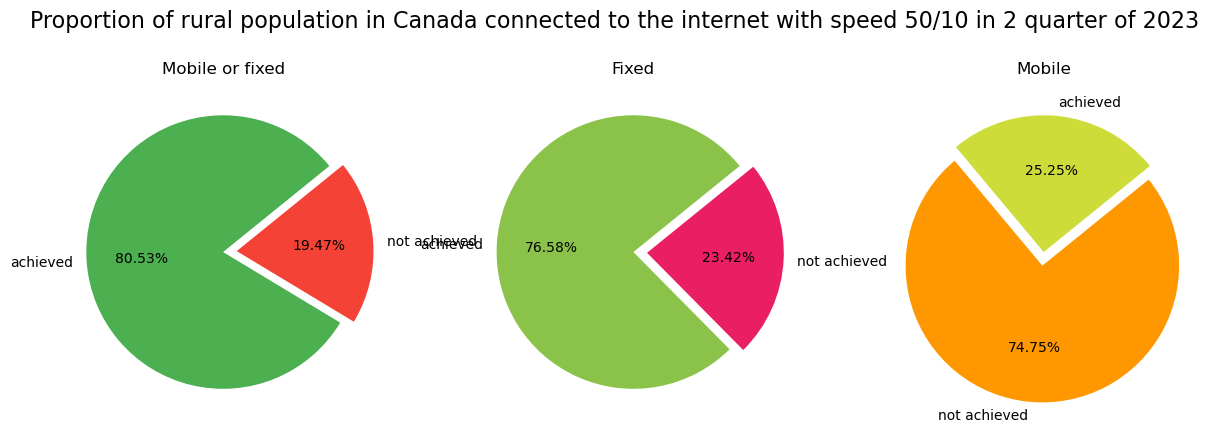

In [459]:
green_colors = ['#4CAF50', '#8BC34A', '#CDDC39']
red_colors = ['#F44336', '#E91E63', '#FF9800']
color_map = [green_colors[0], red_colors[0]]
color_map1 = [green_colors[1], red_colors[1]]
color_map2 = [green_colors[2], red_colors[2]]
fig, ax = plt.subplots(1, 3, figsize =  (15, 6))
ax[0].pie([canada_rural_overall_pop, 1-canada_rural_overall_pop], explode = [0, 0.1],colors = color_map, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[1].pie([canada_rural_fixed_pop, 1-canada_rural_fixed_pop], explode = [0, 0.1],colors = color_map1, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[2].pie([canada_rural_mobile_pop, 1-canada_rural_mobile_pop], explode = [0, 0.1],colors = color_map2, labels = ['achieved', 'not achieved'], autopct='%1.2f%%',
        startangle = 39)
ax[0].set_title('Mobile or fixed')
ax[1].set_title('Fixed')
ax[2].set_title('Mobile')
plt.suptitle('Proportion of rural population in Canada connected to the internet with speed 50/10 in 2 quarter of 2023', x=0.5, y=0.9, fontsize=16, ha='center')
plt.show()

## Achievement of 50/10 speed by provincies

# ARIMA model


In [158]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.6 MB/s eta 0:00:00a 0:00:01


In [159]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [209]:
# df1 = pd.DataFrame(columns = ('Province', 'year-quarter' 'avg_fixed_d_kbps', 'avg_fixed_u_kbps', 'avg_mobile_d_kbps', 'avg_mobile_u_kbps'))
# for year in df0['year'].unique():
#     for quarter in df0['quarter'].unique():
#         for province in df0['PRNAME'].unique():
#             mobile_avg_d = df0[(df0['year'] == year)&(df0['quarter'] == quarter)&
#                                (df0['PRNAME'] == province) & (df0['conn_type'] == 'mobile')]['avg_d_kbps'].mean()
#             mobile_avg_u = df0[(df0['year'] == year)&(df0['quarter'] == quarter)&
#                                (df0['PRNAME'] == province) & (df0['conn_type'] == 'mobile')]['avg_u_kbps'].mean()
#             fixed_avg_d = df0[(df0['year'] == year)&(df0['quarter'] == quarter)&
#                               (df0['PRNAME'] == province) & (df0['conn_type'] == 'fixed')]['avg_d_kbps'].mean()
#             fixed_avg_u = df0[(df0['year'] == year)&(df0['quarter'] == quarter)&
#                               (df0['PRNAME'] == province) & (df0['conn_type'] == 'fixed')]['avg_u_kbps'].mean()
#             print(year, quarter, province, mobile_avg_d, mobile_avg_u, fixed_avg_d, fixed_avg_u)
#             new_row = {'Province': province, 'year-quarter': str(year)+'-'+str(quarter), 
#                        'avg_fixed_d_kbps': fixed_avg_d, 'avg_fixed_u_kbps': fixed_avg_u, 
#                        'avg_mobile_d_kbps': mobile_avg_d, 'avg_mobile_u_kbps': mobile_avg_u}
#             print(new_row)
#             #df1 = pd.concat([df1, pd.DataFrame(new_row)])

In [462]:
grouped = df0.groupby(['year', 'quarter', 'PRNAME', 'conn_type']).agg({
    'avg_d_kbps': 'mean',
    'avg_u_kbps': 'mean',
}).unstack('conn_type').reset_index()
grouped['year-quarter'] = grouped['year'].astype(str) + '-' + grouped['quarter'].astype(str)
grouped.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in grouped.columns]
df1 = grouped.rename(columns={
    'PRNAME': 'province',
    'year-quarter': 'year-quarter',
    'avg_d_kbps_fixed': 'avg_fixed_d_kbps',
    'avg_u_kbps_fixed': 'avg_fixed_u_kbps',
    'avg_d_kbps_mobile': 'avg_mobile_d_kbps',
    'avg_u_kbps_mobile': 'avg_mobile_u_kbps'
})
df1[df1['province'] == 'Alberta']

,year,quarter,province,avg_fixed_d_kbps,avg_mobile_d_kbps,avg_fixed_u_kbps,avg_mobile_u_kbps,year-quarter
0,2019,1,Alberta,90503.520559,81849.578729,16591.922935,15969.922347,2019-1
13,2019,2,Alberta,93736.387206,82218.146368,18197.751425,15600.600750,2019-2
26,2019,3,Alberta,94604.040894,82587.854991,20280.741851,14221.985340,2019-3
39,2019,4,Alberta,98830.220387,90038.048335,23505.073286,15881.485330,2019-4
52,2020,1,Alberta,101659.544799,96518.410439,24481.304158,15946.012896,2020-1
65,2020,2,Alberta,102183.839305,100389.281963,26555.449037,14753.537752,2020-2
78,2020,3,Alberta,107474.242155,93525.218793,31091.913318,16583.556745,2020-3
91,2020,4,Alberta,119699.988837,107542.262053,38890.629005,16962.675748,2020-4
104,2021,1,Alberta,133128.830828,109221.603343,42757.572885,17069.742465,2021-1
117,2021,2,Alberta,152113.111765,110657.552408,46922.666042,17112.441613,2021-2


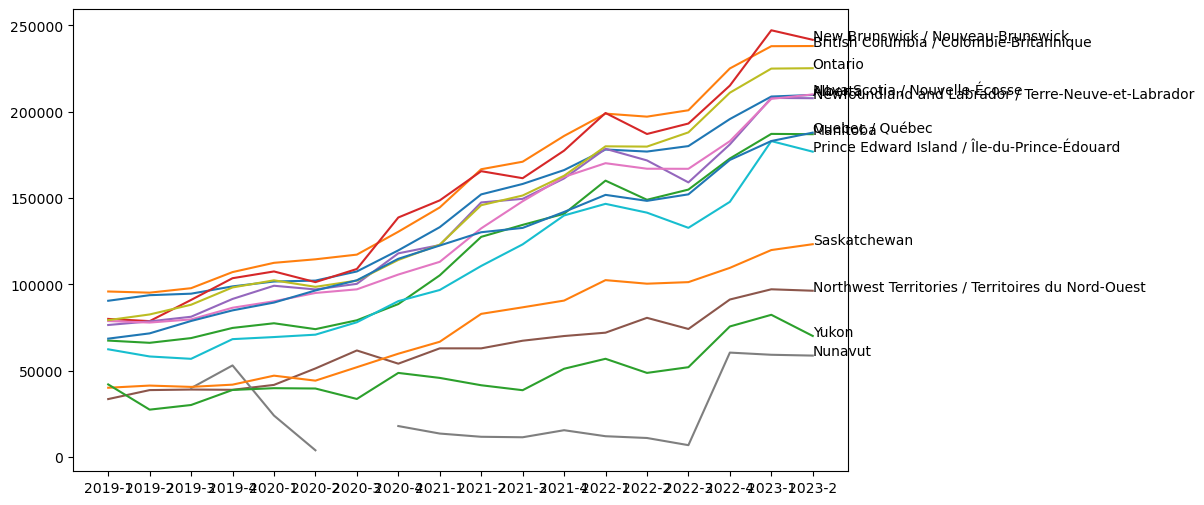

In [465]:
plt.figure(figsize=(10, 6))
for province in df1['province'].unique():
    df_prov = df1[df1['province'] == province]
    plt.plot(df_prov['year-quarter'], df_prov['avg_fixed_d_kbps'], label = province)
    plt.annotate(province, xy=(df_prov['year-quarter'].iloc[-1], df_prov['avg_fixed_d_kbps'].iloc[-1]))
#plt.legend()
plt.show()

In [271]:
df_arima = df1[df1['province'] == df1['province'].unique()[0]]
model = pm.auto_arima(df_arima['avg_fixed_d_kbps'], d=None, D=None,seasonal=True, m=4, 
                      trend='c',start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[4]             : AIC=337.312, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=333.317, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=337.319, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=337.680, Time=0.03 sec
 ARIMA(0,2,0)(1,0,0)[4]             : AIC=335.310, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[4]             : AIC=335.310, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=335.326, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=335.687, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=337.261, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[4] intercept   : AIC=333.317, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[4] intercept
Total fit time: 0.435 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -1

<Axes: >

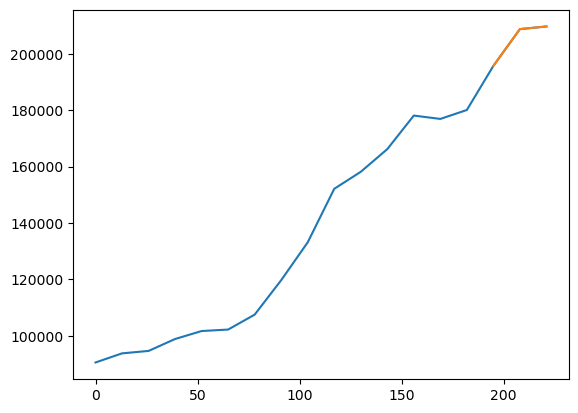

In [332]:
train = df_arima[:int(1*(len(df_arima)))]
test = df_arima[int(0.85*(len(df_arima))):]
train['avg_fixed_d_kbps'].plot()
test['avg_fixed_d_kbps'].plot()

In [352]:
best_order

(0, 0, 0)

In [353]:
best_seasonal_order

(2, 2, 0, 4)

In [363]:
import statsmodels.api as sm
model2 = sm.tsa.ARIMA(train['avg_fixed_d_kbps'],order=(0,2,0))
results = model2.fit()
print("Results of SARIMAX on train")
print(results.summary())

Results of SARIMAX on train
                               SARIMAX Results                                
Dep. Variable:       avg_fixed_d_kbps   No. Observations:                   18
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -164.663
Date:                Wed, 11 Oct 2023   AIC                            331.325
Time:                        07:28:44   BIC                            332.098
Sample:                             0   HQIC                           331.365
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.026e+07   1.96e+07      2.568      0.010    1.19e+07    8.86e+07
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.91
Prob(Q):           

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


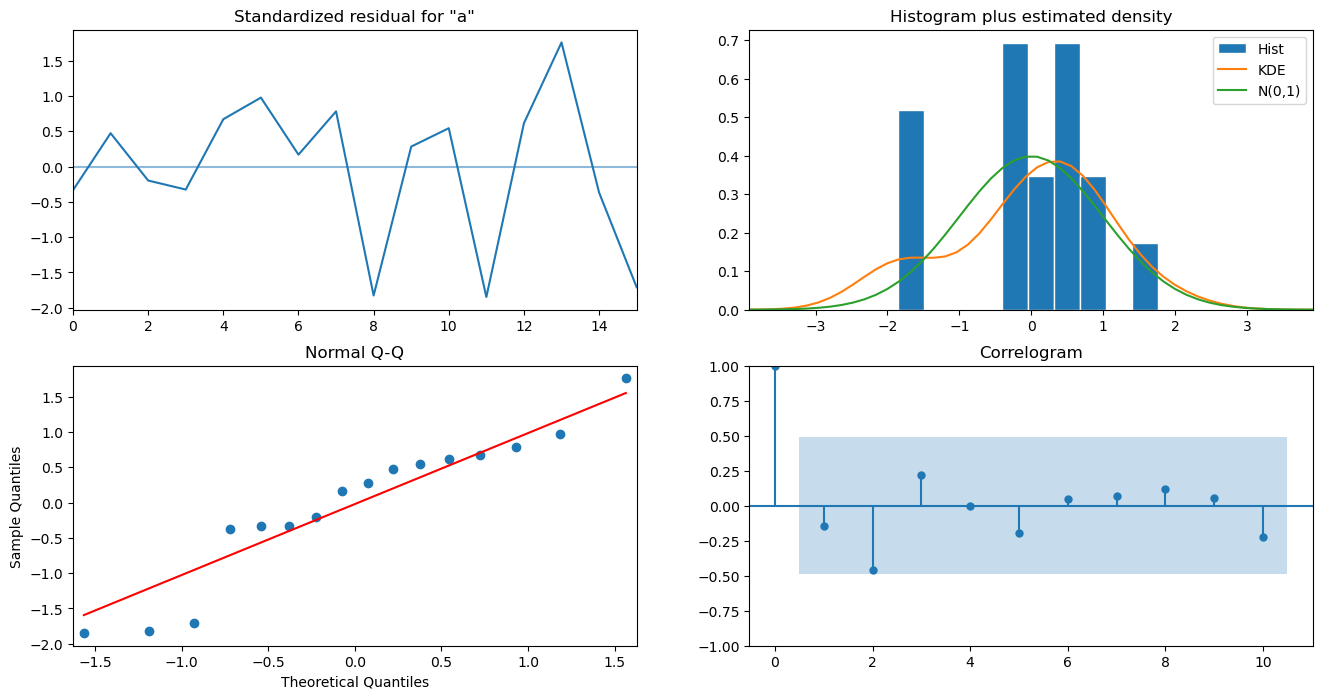

In [364]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [335]:
train

,year,quarter,province,avg_fixed_d_kbps,avg_mobile_d_kbps,avg_fixed_u_kbps,avg_mobile_u_kbps,year-quarter
0,2019,1,Alberta,90503.520559,81849.578729,16591.922935,15969.922347,2019-1
13,2019,2,Alberta,93736.387206,82218.146368,18197.751425,15600.600750,2019-2
26,2019,3,Alberta,94604.040894,82587.854991,20280.741851,14221.985340,2019-3
39,2019,4,Alberta,98830.220387,90038.048335,23505.073286,15881.485330,2019-4
52,2020,1,Alberta,101659.544799,96518.410439,24481.304158,15946.012896,2020-1
65,2020,2,Alberta,102183.839305,100389.281963,26555.449037,14753.537752,2020-2
78,2020,3,Alberta,107474.242155,93525.218793,31091.913318,16583.556745,2020-3
91,2020,4,Alberta,119699.988837,107542.262053,38890.629005,16962.675748,2020-4
104,2021,1,Alberta,133128.830828,109221.603343,42757.572885,17069.742465,2021-1
117,2021,2,Alberta,152113.111765,110657.552408,46922.666042,17112.441613,2021-2


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


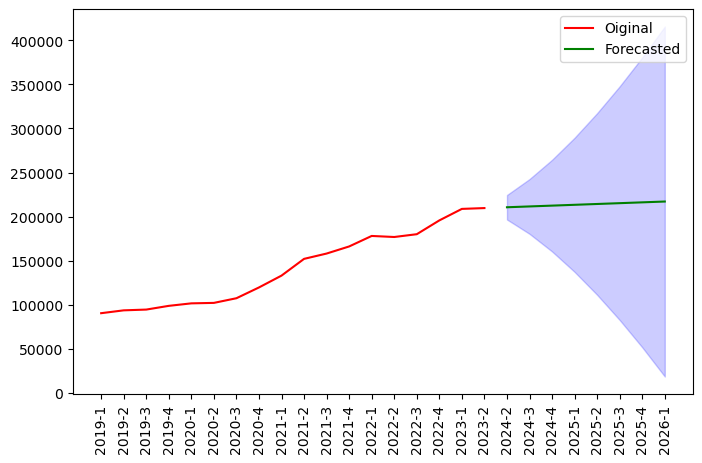

In [365]:
forecast = results.get_forecast(steps=len(test)+5)
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
forecast_steps = [str(2023+(x-13)//4) + '-' + str((x-1)%4+1) for x in d]

plt.figure(figsize=(8,5))
plt.plot(train['year-quarter'], train["avg_fixed_d_kbps"], label='Oiginal', color = 'red')
plt.plot(forecast_steps, mean, label='Forecasted', color= 'green')
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color= 'blue')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [374]:
df_arima['avg_mobile_d_kbps_diff'] = df_arima['avg_mobile_d_kbps'] - df_arima['avg_mobile_d_kbps'].shift(1)
df_arima['avg_mobile_d_kbps_diff'].fillna(0, inplace = True)
df_arima

/tmp/ipykernel_10086/2375175140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arima['avg_mobile_d_kbps_diff'] = df_arima['avg_mobile_d_kbps'] - df_arima['avg_mobile_d_kbps'].shift(1)
/tmp/ipykernel_10086/2375175140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arima['avg_mobile_d_kbps_diff'].fillna(0, inplace = True)


,year,quarter,province,avg_fixed_d_kbps,avg_mobile_d_kbps,avg_fixed_u_kbps,avg_mobile_u_kbps,year-quarter,avg_mobile_d_kbps_diff
0,2019.0,1.0,Alberta,90503.520559,81849.578729,16591.922935,15969.922347,2019-1,0.000000
13,2019.0,2.0,Alberta,93736.387206,82218.146368,18197.751425,15600.600750,2019-2,368.567639
26,2019.0,3.0,Alberta,94604.040894,82587.854991,20280.741851,14221.985340,2019-3,369.708623
39,2019.0,4.0,Alberta,98830.220387,90038.048335,23505.073286,15881.485330,2019-4,7450.193343
52,2020.0,1.0,Alberta,101659.544799,96518.410439,24481.304158,15946.012896,2020-1,6480.362104
65,2020.0,2.0,Alberta,102183.839305,100389.281963,26555.449037,14753.537752,2020-2,3870.871524
78,2020.0,3.0,Alberta,107474.242155,93525.218793,31091.913318,16583.556745,2020-3,-6864.063169
91,2020.0,4.0,Alberta,119699.988837,107542.262053,38890.629005,16962.675748,2020-4,14017.043260
104,2021.0,1.0,Alberta,133128.830828,109221.603343,42757.572885,17069.742465,2021-1,1679.341290
117,2021.0,2.0,Alberta,152113.111765,110657.552408,46922.666042,17112.441613,2021-2,1435.949065


In [393]:
df_arima

,year,quarter,province,avg_fixed_d_kbps,avg_mobile_d_kbps,avg_fixed_u_kbps,avg_mobile_u_kbps,year-quarter,avg_mobile_d_kbps_diff
0,2019.0,1.0,Alberta,90503.520559,81849.578729,16591.922935,15969.922347,2019-1,0.000000
13,2019.0,2.0,Alberta,93736.387206,82218.146368,18197.751425,15600.600750,2019-2,368.567639
26,2019.0,3.0,Alberta,94604.040894,82587.854991,20280.741851,14221.985340,2019-3,369.708623
39,2019.0,4.0,Alberta,98830.220387,90038.048335,23505.073286,15881.485330,2019-4,7450.193343
52,2020.0,1.0,Alberta,101659.544799,96518.410439,24481.304158,15946.012896,2020-1,6480.362104
65,2020.0,2.0,Alberta,102183.839305,100389.281963,26555.449037,14753.537752,2020-2,3870.871524
78,2020.0,3.0,Alberta,107474.242155,93525.218793,31091.913318,16583.556745,2020-3,-6864.063169
91,2020.0,4.0,Alberta,119699.988837,107542.262053,38890.629005,16962.675748,2020-4,14017.043260
104,2021.0,1.0,Alberta,133128.830828,109221.603343,42757.572885,17069.742465,2021-1,1679.341290
117,2021.0,2.0,Alberta,152113.111765,110657.552408,46922.666042,17112.441613,2021-2,1435.949065


In [399]:
df_arima = df_arima.drop('avg_d_kbps_diff')
df_arima

KeyError: "['avg_d_kbps_diff'] not found in axis"

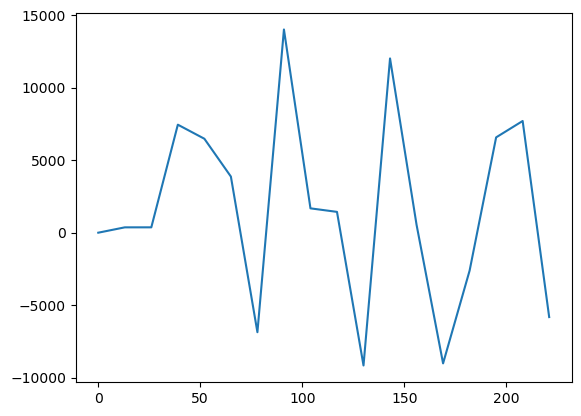

In [401]:
plt.plot(df_arima['avg_mobile_d_kbps_diff'])
plt.show()

## ARIMA usage outcome:
Not enough data for forecasting using Time Series. Confidence interval becomes too wide if we try to forecast untill 2026.